# **Clonando repositório GitHub Tech Challenge**

In [ ]:
# import os

# if not os.path.exists('/content'):
#     os.makedirs('/content')
# os.chdir('/content')
# print("Diretório atual:", os.getcwd())


Diretório atual: /content


In [ ]:
!git clone https://github.com/Igorbr321/FIAP-tech-challenge-1.git

Cloning into 'FIAP-tech-challenge-1'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 23 (delta 5), reused 16 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (23/23), 524.00 KiB | 14.97 MiB/s, done.
Resolving deltas: 100% (5/5), done.


# **Importando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm

#**Comércio de Vinhos**

In [ ]:
"Dados anuais em volumes de litros"

comercio = pd.read_csv(r'/content/FIAP-tech-challenge-1/Dataset and Instructions/Comercio.csv', sep=";", thousands=".",decimal=",")
pd.set_option('display.max_columns', None)
comercio.head(5)

,id,control,Produto,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,98327606,114399031,118377367,116617910,94173324,108031792,139238614,140813114,141293379,149609112,122825298,128894580,166861772,195616620,171619507,185191837,203130018,131065191,150678647,172921267,164725646,190134895,180230431,201168480,180295366,146583828,165831436,174768638,181576649,200578746,221023603,221518224,227447392,217082959,225021830,271248493,245625614,226710045,200488612,234525979,221242945,230310468,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
1,2,vm_Tinto,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,116609545,117203914,119496652,99646124,99151812,131957890,151852639,129249097,138710394,153357217,96590206,114100716,136642954,120889721,141726264,138190489,157031022,140192480,108968350,122549540,127693158,133479291,150857434,172183792,176793696,181274195,179225328,186236086,227987458,209438207,190526781,172020779,193004182,188649074,196562722,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340,165097539
2,3,vm_Rosado,Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,15195525,14612454,18643308,14746625,16360547,15786964,23841328,21724540,23988088,28544630,21376304,17329181,14564451,16482188,16322381,12822511,13767249,13762956,11653971,13374874,13550872,12980172,13221934,9150927,7283912,8434812,6945806,5478618,3562059,3071382,2252558,1840779,2307580,2036928,1668823,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723,2520748
3,4,vm_Branco,Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,9008044,9477011,11469152,8432549,13382221,19116918,19922653,20645870,22493355,21228171,13098681,19248750,21713862,27353737,32086250,29217431,30370209,26339930,25961507,29907022,33524608,35117186,36499378,39688884,37440616,37738385,30911825,33307126,39698976,33116025,29122090,26627054,39214217,30556943,32078923,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933,19398561
4,5,VINHO FINO DE MESA,VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,14975330,17596956,21695829,22976342,21607857,26302928,32690119,42164393,44599207,50881779,34335860,40014386,50390262,39885259,37526111,39537060,49916112,46541918,40195501,43695771,46442209,32456318,37096571,34195829,28701658,25438750,23293171,19884366,22306004,22767358,21485699,23167738,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487,18589310


In [ ]:
import pandas as pd
import numpy as np

comercio_ajustado = comercio.drop(columns=['id', 'control'])

comercio_ajustado = comercio_ajustado.dropna()

comercio_ajustado = comercio_ajustado[(comercio_ajustado != 0).all(axis=1)]

numeric_cols = comercio_ajustado.select_dtypes(include=np.number).columns

for col in numeric_cols:
    comercio_ajustado[col] = comercio_ajustado[col].astype(str)
    comercio_ajustado = comercio_ajustado[~comercio_ajustado[col].str.len().isin([0])]
    comercio_ajustado[col] = pd.to_numeric(comercio_ajustado[col], errors='coerce')
    comercio_ajustado = comercio_ajustado[comercio_ajustado[col] >= 2008]

comercio_ajustado = comercio_ajustado.dropna()

comercio_ajustado.head(5)

,Produto,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,VINHO DE MESA,98327606,114399031,118377367,116617910,94173324,108031792,139238614,140813114,141293379,149609112,122825298,128894580,166861772,195616620,171619507,185191837,203130018,131065191,150678647,172921267,164725646,190134895,180230431,201168480,180295366,146583828,165831436,174768638,181576649,200578746,221023603,221518224,227447392,217082959,225021830,271248493,245625614,226710045,200488612,234525979,221242945,230310468,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
1,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,116609545,117203914,119496652,99646124,99151812,131957890,151852639,129249097,138710394,153357217,96590206,114100716,136642954,120889721,141726264,138190489,157031022,140192480,108968350,122549540,127693158,133479291,150857434,172183792,176793696,181274195,179225328,186236086,227987458,209438207,190526781,172020779,193004182,188649074,196562722,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340,165097539
2,Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,15195525,14612454,18643308,14746625,16360547,15786964,23841328,21724540,23988088,28544630,21376304,17329181,14564451,16482188,16322381,12822511,13767249,13762956,11653971,13374874,13550872,12980172,13221934,9150927,7283912,8434812,6945806,5478618,3562059,3071382,2252558,1840779,2307580,2036928,1668823,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723,2520748
3,Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,9008044,9477011,11469152,8432549,13382221,19116918,19922653,20645870,22493355,21228171,13098681,19248750,21713862,27353737,32086250,29217431,30370209,26339930,25961507,29907022,33524608,35117186,36499378,39688884,37440616,37738385,30911825,33307126,39698976,33116025,29122090,26627054,39214217,30556943,32078923,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933,19398561
4,VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,14975330,17596956,21695829,22976342,21607857,26302928,32690119,42164393,44599207,50881779,34335860,40014386,50390262,39885259,37526111,39537060,49916112,46541918,40195501,43695771,46442209,32456318,37096571,34195829,28701658,25438750,23293171,19884366,22306004,22767358,21485699,23167738,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487,18589310


In [ ]:
colunas_selecionadas = ['Produto'] + [col for col in comercio_ajustado.columns if col.startswith('2008') or col.startswith('2009') or col.startswith('2010') or col.startswith('2011') or col.startswith('2012') or col.startswith('2013') or col.startswith('2014') or col.startswith('2015') or col.startswith('2016') or col.startswith('2017') or col.startswith('2018') or col.startswith('2019') or col.startswith('2020') or col.startswith('2021') or col.startswith('2022') or col.startswith('2023')]
comercio_filtrado = comercio_ajustado[colunas_selecionadas]
comercio_filtrado

,Produto,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,VINHO DE MESA,200488612,234525979,221242945,230310468,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238,187939996,187016848
1,Tinto,172020779,193004182,188649074,196562722,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340,165097539
2,Rosado,1840779,2307580,2036928,1668823,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723,2520748
3,Branco,26627054,39214217,30556943,32078923,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933,19398561
4,VINHO FINO DE MESA,23167738,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445,21533487,18589310
5,Tinto,13920224,19576295,15184398,14876896,15443016,19121750,15354938,15572632,15228514,12021684,11150517,11433702,18202453,19337862,15258778,12450606
6,Rosado,313513,213835,236802,211484,150806,214269,164219,169185,172351,182080,262430,503524,993248,1603537,1318396,1214583
7,Branco,8934001,13290140,5968959,4878930,6876128,8576915,4905826,4399814,4229293,3670590,3413196,3747362,5115133,6139046,4956314,4924121
14,ESPUMANTES,9539610,11242890,12647906,13305275,14889147,15978504,17191075,18897144,16945710,17583283,18218375,22759859,22610762,31242697,29525942,29381635
18,SUCO DE UVAS,21568032,29131455,35164681,45222136,53832204,75973297,88013377,115288072,92290851,107243326,140472108,147907617,144889668,147753321,157125036,166708720


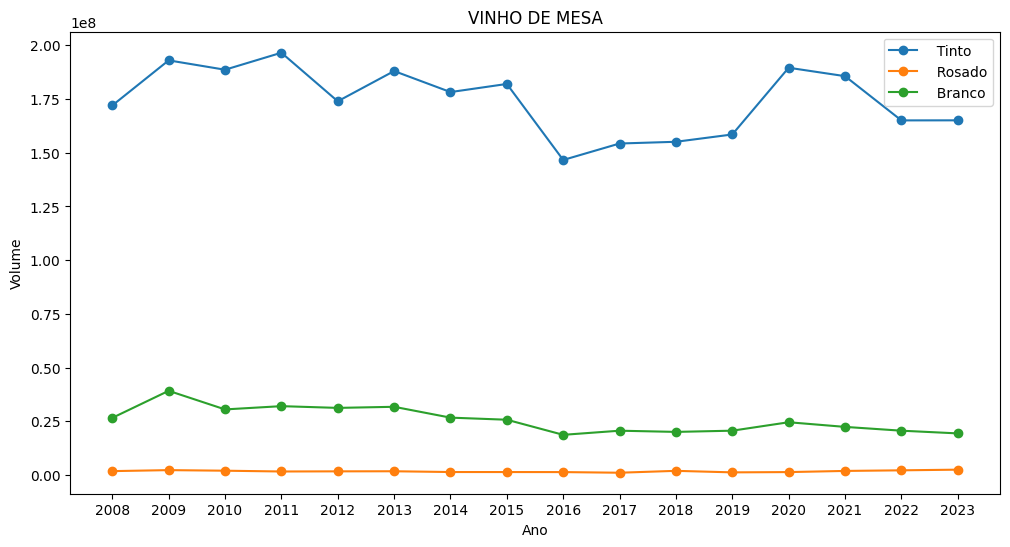

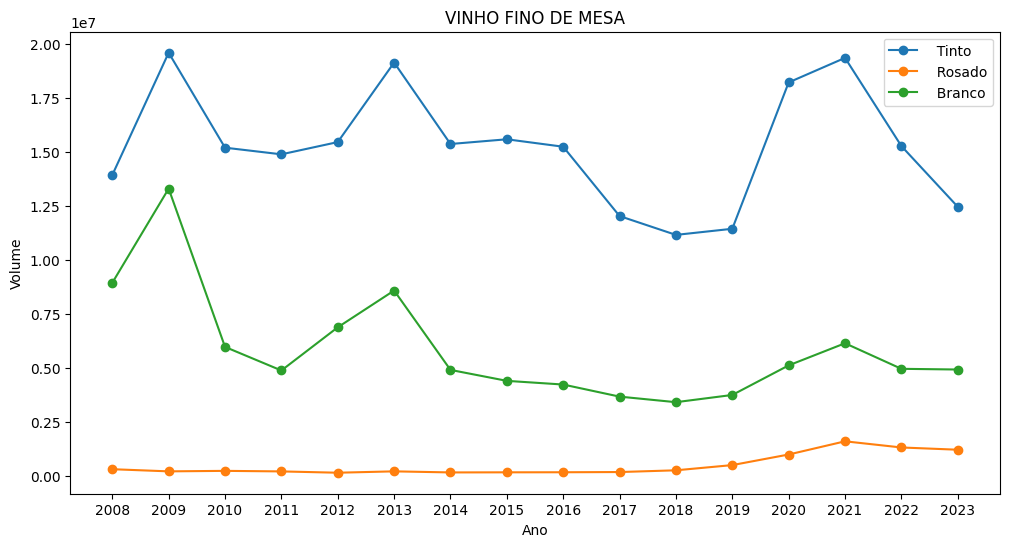

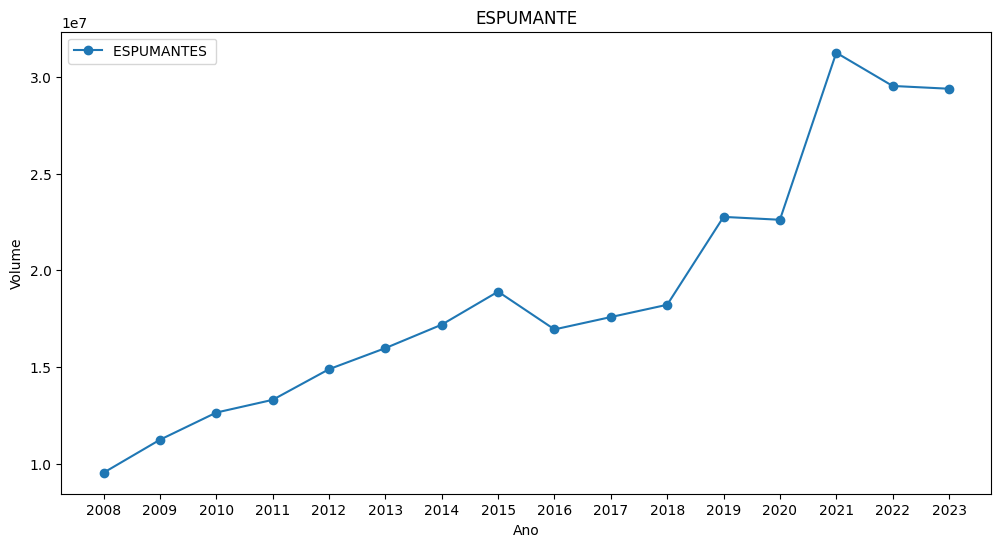

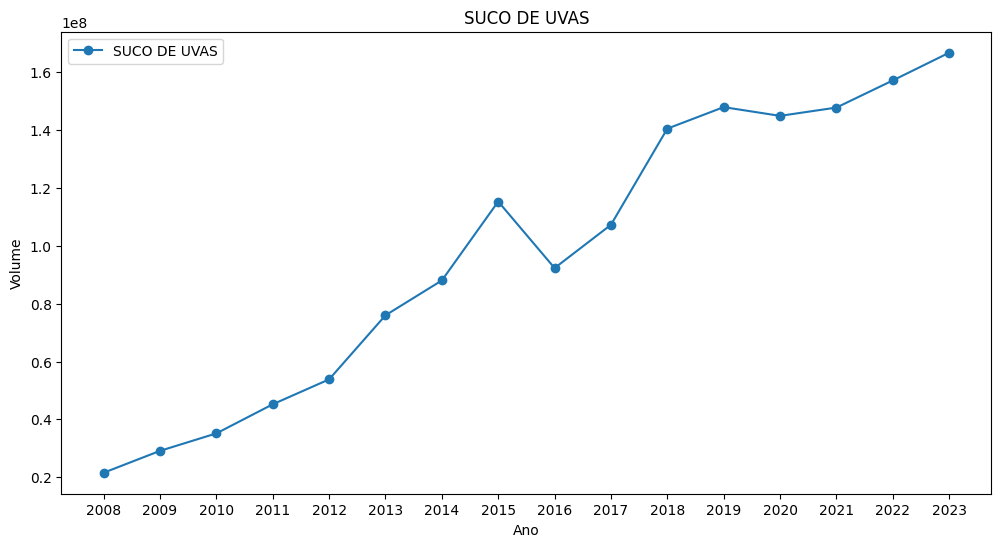

In [ ]:
def create_line_plot(df, title, rows, years):
    plt.figure(figsize=(12, 6))
    for i, row in enumerate(rows):

        valid_years = [year for year in years if year in df.columns]

        numeric_years = pd.to_numeric(valid_years)

        data_for_plot = pd.to_numeric(df.iloc[row][valid_years], errors='coerce')

        plt.plot(numeric_years, data_for_plot, label=df['Produto'][row], marker='o')
    plt.title(title)
    plt.xlabel('Ano')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(False)
    plt.xticks(numeric_years)
    plt.show()

years = [str(year) for year in range(2008, 2024)]

comercio_filtrado = comercio_filtrado.reset_index(drop=True)

create_line_plot(comercio_filtrado, "VINHO DE MESA", [1, 2, 3], years)
create_line_plot(comercio_filtrado, "VINHO FINO DE MESA", [5, 6, 7], years)
create_line_plot(comercio_filtrado, "ESPUMANTE", [8], years)
create_line_plot(comercio_filtrado, "SUCO DE UVAS", [9], years)

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.ticker as ticker
# import matplotlib.cm as cm

# def create_line_plot(df, title, rows, years):
#     plt.figure(figsize=(12, 6))
#     for i, row in enumerate(rows):
#         valid_years = [year for year in years if year in df.columns]
#         numeric_years = pd.to_numeric(valid_years)
#         data_for_plot = pd.to_numeric(df.iloc[row][valid_years], errors='coerce')
#         plt.plot(numeric_years, data_for_plot, label=df['Produto'][row], marker='o')
#     plt.title(title)
#     plt.xlabel('Ano')
#     plt.ylabel('Volume')
#     plt.legend()
#     plt.grid(False)
#     plt.xticks(numeric_years)

#     plt.savefig(f"{title}.png")
#     plt.show()

# create_line_plot(comercio_filtrado, "VINHO DE MESA", [1, 2, 3], years)
# create_line_plot(comercio_filtrado, "VINHO FINO DE MESA", [5, 6, 7], years)
# create_line_plot(comercio_filtrado, "ESPUMANTE", [8], years)
# create_line_plot(comercio_filtrado, "SUCO DE UVAS", [9], years)

# from google.colab import files
# files.download("VINHO DE MESA.png")
# files.download("VINHO FINO DE MESA.png")
# files.download("ESPUMANTE.png")
# files.download("SUCO DE UVAS.png")

In [ ]:
years = [str(year) for year in range(2008, 2024)]
vinho_mesa = comercio_ajustado.iloc[[1, 2, 3]][['Produto'] + years]

vinho_mesa = vinho_mesa.rename(columns={'Produto': 'Vinho de Mesa'})

vinho_mesa

,Vinho de Mesa,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,Tinto,172020779,193004182,188649074,196562722,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678,165067340,165097539
2,Rosado,1840779,2307580,2036928,1668823,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606,2213723,2520748
3,Branco,26627054,39214217,30556943,32078923,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954,20658933,19398561


In [ ]:
years = [str(year) for year in range(2008, 2024)]
vinho_fino_mesa = comercio_ajustado.iloc[[5, 6, 7]][['Produto'] + years]

vinho_fino_mesa = vinho_fino_mesa.rename(columns={'Produto': 'Vinho Fino de Mesa'})

vinho_fino_mesa

,Vinho Fino de Mesa,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
5,Tinto,13920224,19576295,15184398,14876896,15443016,19121750,15354938,15572632,15228514,12021684,11150517,11433702,18202453,19337862,15258778,12450606
6,Rosado,313513,213835,236802,211484,150806,214269,164219,169185,172351,182080,262430,503524,993248,1603537,1318396,1214583
7,Branco,8934001,13290140,5968959,4878930,6876128,8576915,4905826,4399814,4229293,3670590,3413196,3747362,5115133,6139046,4956314,4924121


In [ ]:
years = [str(year) for year in range(2008, 2024)]
espumante = comercio_ajustado.iloc[[8]][['Produto'] + years]

espumante = espumante.rename(columns={'Produto': 'Espumante'})

espumante

,Espumante,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
14,ESPUMANTES,9539610,11242890,12647906,13305275,14889147,15978504,17191075,18897144,16945710,17583283,18218375,22759859,22610762,31242697,29525942,29381635


In [ ]:
years = [str(year) for year in range(2008, 2024)]
suco_uva = comercio_ajustado.iloc[[9]][['Produto'] + years]

suco_uva = suco_uva.rename(columns={'Produto': 'Suco de Uva'})

suco_uva

,Suco de Uva,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
18,SUCO DE UVAS,21568032,29131455,35164681,45222136,53832204,75973297,88013377,115288072,92290851,107243326,140472108,147907617,144889668,147753321,157125036,166708720


#**Exportação de Vinhos**

In [ ]:
exportacao = pd.read_csv(r'/content/FIAP-tech-challenge-1/Dataset and Instructions/ExpVinho.csv', sep=";", thousands=".", decimal=",")
pd.set_option('display.max_columns', None)
exportacao

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,1975,1975.1,1976,1976.1,1977,1977.1,1978,1978.1,1979,1979.1,1980,1980.1,1981,1981.1,1982,1982.1,1983,1983.1,1984,1984.1,1985,1985.1,1986,1986.1,1987,1987.1,1988,1988.1,1989,1989.1,1990,1990.1,1991,1991.1,1992,1992.1,1993,1993.1,1994,1994.1,1995,1995.1,1996,1996.1,1997,1997.1,1998,1998.1,1999,1999.1,2000,2000.1,2001,2001.1,2002,2002.1,2003,2003.1,2004,2004.1,2005,2005.1,2006,2006.1,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,46,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,463,1673,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,95,4,21,0,0,0,0,117,698
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,0,0,0,0,0,0,0,0,0,0,5400,6500,0,0,0,0,0,0,0,0,0,0,67,136,1037,1750,2700,4044,2205,3921,197,510,0,0,3780,7182,2700,5143,0,0,0,0,20700,40590,0,0,43,307,504,700,0,0,9900,15620,1673,11157,1080,4626,0,0,13589,28140,57393,106702,38302,89231,119512,238052,265742,429970,225086,393482,27715,138666,36070,144150,8189,56342,61699,265978,213348,761653,10680,44780,14012,68109,15467,87702,10794,45382,3660,25467,6261,32605,2698,6741,7630,45367,4806,31853
3,4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3465756,2387643,1682244,1118023,0,0,0,0,0,0,0,0,339,1082,774,1718,1316,3847,18500,12950,168,134,930,1090,125,116,292,332,189,238,0,0,24,46,2118,6401,68494,146017,15780,34732,10998,16738,249717,368817,12150,15529,9812,5290,19937,11437,37573,50382,24056,33039,3766,18293,25931,49753,25721,71083,54786,84235,33557,189891,13889,69001,2833,8861,1573,9300,12182,23124,1908,17089,7359,35390,10170,61680,477,709,345,1065,0,0,0,0,4068,4761,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,130,80,324,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,Tuvalu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0
133,134,Uruguai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1384,720,13396,5128,31374,12285,7602,7500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4940,10080,0,0,42042,21815,12491,11233,46904,34226,49219,38244,72533,41576,44476,30075,6689,3270,27350,10008,12250,4701,1296,766,0,0,1008,1685,0,0,0,0,0,0,914,2929,1238,4404,1135,3879,1526,13343,0,0,0,0,0,0,0,0,7711,29617,6180,18497,0,0,136774,149842,637117,997367,326093,454271
134,135,Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,31,0,0,0,0,0,0
135,136,Venezuela,0,0,3200,2000,1350,750,11700,6458,9830,5250,4050,2488,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20700,27370,0,0,0,0,0,0,0,0,1029,7492,0,0,14,232,0,0,0,0,680,2646,71,355,0,0,4086,9808,26415,35944,23220,32351,141030

In [ ]:
"""
Obs: A primeira coluna do dataset original é referente ao Kg. A segunda coluna é referente ao valor.

Exemplo: Coluna 2010 contem o "kg" e a coluna 2010.1 contem o "valor

"""

new_data = {'País': [], 'Ano': [], 'Volume Litro': [], 'Valor': []}


for column in exportacao.columns[2:]:
    year = column.split('.')[0]  # Extrai o ano do nome da coluna
    if '.' not in column:
        year = int(year)
        if year >= 2008:
            new_data['Ano'].extend([int(year)] * len(exportacao))
            new_data['País'].extend(exportacao['País'])
            new_data['Volume Litro'].extend(exportacao[column])

        # Encontra coluna de valor correspondente
            valor_col = column + '.1'
            if valor_col in exportacao.columns:
                new_data['Valor'].extend(exportacao[valor_col])
            else:
                # Se a coluna de valor não existe, adiciona NaN
                new_data['Valor'].extend([np.nan] * len(exportacao))

pd.set_option('display.max_rows', None)
exportacao_tratada = pd.DataFrame(new_data)
exportacao_tratada = exportacao_tratada[~((exportacao_tratada['Volume Litro'] == 0) | (exportacao_tratada['Valor'] == 0) | (exportacao_tratada['Volume Litro'].isna()) | (exportacao_tratada['Valor'].isna()))]
exportacao_tratada_ordenada = exportacao_tratada.sort_values(by='Valor', ascending=False)
exportacao_tratada_ordenada.head(20)

,País,Ano,Volume Litro,Valor
797,Rússia,2013,5893291,14795694
1884,Paraguai,2021,6522527,7192362
2021,Paraguai,2022,5076670,7156293
249,Rússia,2009,21912914,5732280
2158,Paraguai,2023,3780378,5517263
1473,Paraguai,2018,3234168,5494321
1336,Paraguai,2017,2393468,4274650
1747,Paraguai,2020,3299013,3869243
1610,Paraguai,2019,2419537,3826587
734,Espanha,2013,1972980,3748940


In [ ]:
country_counts_exportacao = exportacao_tratada['País'].value_counts()
print("\nContagem de países na base de importação:\n", country_counts_exportacao)


Contagem de países na base de importação:
 País
Alemanha, República Democrática    16
Reino Unido                        16
Austrália                          16
Bélgica                            16
Paraguai                           16
Tcheca, República                  16
China                              16
Japão                              16
Estados Unidos                     16
Emirados Arabes Unidos             15
Países Baixos                      15
Luxemburgo                         15
Hong Kong                          15
Suriname                           15
Canadá                             15
Bolívia                            15
Dinamarca                          15
Suíça                              14
Suécia                             14
Polônia                            14
Itália                             14
França                             14
Nova Zelândia                      13
Angola                             13
Portugal                           13
C

In [ ]:
paises_frequentes = country_counts_exportacao[country_counts_exportacao > 12].index

# Filtra a tabela 'exportacao_tratada_ordenada' para incluir apenas os países frequentes
tabela_filtrada = exportacao_tratada_ordenada[exportacao_tratada_ordenada['País'].isin(paises_frequentes)]

# Retirando os dados do País "Paraguai" devido caracterizar um Outlier
tabela_filtrada = tabela_filtrada[tabela_filtrada['País']!='Paraguai']

# Agrupa por país e soma os valores de 'Kg' e 'Valor'
tabela_consolidada_exp = tabela_filtrada.groupby('País').agg({'Volume Litro': 'sum', 'Valor': 'sum'})


tabela_consolidada_exp

,Volume Litro,Valor
País,,
"Alemanha, República Democrática",913857,2578247
Angola,168868,576189
Austrália,277139,482813
Bolívia,226347,327068
Bélgica,402762,1395909
Canadá,207030,1139596
China,2583375,4929621
Dinamarca,79838,390836
Emirados Arabes Unidos,18729,151605


In [ ]:
tabela_consolidada_exp['Valor Litro'] = tabela_consolidada_exp['Valor'] / tabela_consolidada_exp['Volume Litro']

tabela_consolidada_exp['Valor'] = tabela_consolidada_exp['Valor'].apply(lambda x: "US$ {:,.2f}".format(x))
tabela_consolidada_exp['Valor Litro'] = tabela_consolidada_exp['Valor Litro'].apply(lambda x: "US$ {:,.2f}".format(x))

tabela_consolidada_exp

,Volume Litro,Valor,Valor Litro
País,,,
"Alemanha, República Democrática",913857,"US$ 2,578,247.00",US$ 2.82
Angola,168868,"US$ 576,189.00",US$ 3.41
Austrália,277139,"US$ 482,813.00",US$ 1.74
Bolívia,226347,"US$ 327,068.00",US$ 1.44
Bélgica,402762,"US$ 1,395,909.00",US$ 3.47
Canadá,207030,"US$ 1,139,596.00",US$ 5.50
China,2583375,"US$ 4,929,621.00",US$ 1.91
Dinamarca,79838,"US$ 390,836.00",US$ 4.90
Emirados Arabes Unidos,18729,"US$ 151,605.00",US$ 8.09


#**Paraguai - Um caso de Outlier**

<ipython-input-10-15342bba6fc4>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('OrRd')


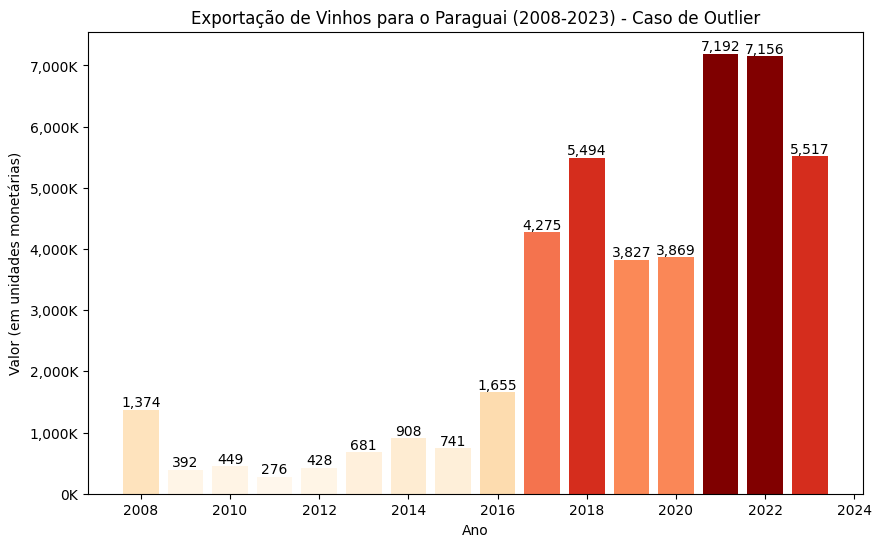

In [ ]:
paraguai_data = exportacao_tratada[(exportacao_tratada['País'] == 'Paraguai') & (exportacao_tratada['Ano'] >= 2008) & (exportacao_tratada['Ano'] <= 2023)]

plt.figure(figsize=(10, 6))

cmap = cm.get_cmap('OrRd')
norm = plt.Normalize(paraguai_data['Valor'].min(), paraguai_data['Valor'].max())
colors = cmap(norm(paraguai_data['Valor']))

plt.bar(paraguai_data['Ano'], paraguai_data['Valor'], color=colors)

plt.xlabel('Ano')
plt.ylabel('Valor (em unidades monetárias)')
plt.title('Exportação de Vinhos para o Paraguai (2008-2023) - Caso de Outlier')

plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))

for x, y in zip(paraguai_data['Ano'], paraguai_data['Valor']):
    label = f'{y/1000:,.0f}'
    plt.text(x, y, label, ha='center', va='bottom')

plt.grid(False)
plt.show()

#**Importação de Vinhos**

In [ ]:
importacao = pd.read_csv(r'/content/FIAP-tech-challenge-1/Dataset and Instructions/ImpVinhos.csv', sep=";", thousands=".", decimal=",")
pd.set_option('display.max_columns', None)
importacao.head(5)

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,1974,1974.1,1975,1975.1,1976,1976.1,1977,1977.1,1978,1978.1,1979,1979.1,1980,1980.1,1981,1981.1,1982,1982.1,1983,1983.1,1984,1984.1,1985,1985.1,1986,1986.1,1987,1987.1,1988,1988.1,1989,1989.1,1990,1990.1,1991,1991.1,1992,1992.1,1993,1993.1,1994,1994.1,1995,1995.1,1996,1996.1,1997,1997.1,1998,1998.1,1999,1999.1,2000,2000.1,2001,2001.1,2002,2002.1,2003,2003.1,2004,2004.1,2005,2005.1,2006,2006.1,2007,2007.1,2008,2008.1,2009,2009.1,2010,2010.1,2011,2011.1,2012,2012.1,2013,2013.1,2014,2014.1,2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1
0,1,Africa do Sul,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42661,99201,32194,106317,157239,305701,303489,665101,407413,775421,358870,1164032,386425,1320244,315380,1151699,493093,1931449,966276,3600658,507509,2136394,722327,3041449,475331,1985184,722715,3033932,743335,2996543,578829,1686226,1138732,3241298,1127053,3574371,1092042,3604038,627150,1701072,859169,2508140,738116,2266827,522733,1732850
1,2,Alemanha,52297,30498.0,34606,26027,134438,92103,111523,98638,219173,202502,134354,149931,168134,171308,160926,201840,437831,668631,433478,691404,457033,704307,707194,853830,996948,1126928,850055,908380,586645,564129,1069717,1122438,2357113,3008737,1307519,1863924,2029271,2757417,2885143,4074739,3342223,5875679,3096425,4545305,2515557,3644055,5721360,7155615,11047710,16068528,11919346,19758144,8680860,10629243,4867017,5108215,3014081,4834030,2576557,4539354,1164724,1668539,909077,1169872,759712,829695,573198,629664,420075,550750,253685,382599,314749,634870,234006,647626,293935,1063825,56075,291876,192661,784674,198025,933545,113243,591167,114866,414070,115804,483316,95171,358275,158386,606333,83289,315959,142971,516975,101055,412794,136992,504168,106541,546967,92600,438595,102456,557947
2,3,Argélia,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Arábia Saudita,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43,0,0,563,3249,0,0,0,0,2510,8761,0,0,8,161
4,5,Argentina,19525,12260.0,24942,15022,104906,58137,116887,76121,215930,167473,145823,90855,348653,277507,408399,395615,614134,709813,646978,888941,298471,479464,131738,209173,191972,264487,132634,188625,42438,64603,114570,164424,170413,242678,98854,136841,414931,590758,716062,1153585,455774,721398,852441,1493649,444896,815668,359542,795068,446315,730091,1397904,1992083,779008,1438076,1013306,2089559,1295190,3073775,2475780,5284871,2724941,6556544,2585537,6196286,3867336,6894469,5720024,9653634,10202602,17142493,10845213,21623751,11939727,25822840,15621172,36160548,14417761,37382581,13902750,38521731,16965266,52126581,16673491,58806736,14613839,55633562,12732815,49524694,13437321,53815956,12465041,48043201,14098009,45214862,15461740,51770842,15221318,52817642,16548931,54527380,22610267,66322932,26869241,79527959,27980574,87519642,25276991,83918138


In [ ]:
new_data = {'País': [], 'Ano': [], 'Volume Litro': [], 'Valor': []}


for column in importacao.columns[2:]:
    year = column.split('.')[0]  # Extrai o ano do nome da coluna
    if '.' not in column:
      year = int(year)
      if year >= 2008:
        new_data['Ano'].extend([int(year)] * len(importacao))
        new_data['País'].extend(importacao['País'])
        new_data['Volume Litro'].extend(importacao[column])

        # Encontra coluna de valor correspondente
        valor_col = column + '.1'
        if valor_col in importacao.columns:
            new_data['Valor'].extend(importacao[valor_col])
        else:
            # Se a coluna de valor não existe, adiciona NaN
            new_data['Valor'].extend([np.nan] * len(importacao))


pd.set_option('display.max_rows', None)
importacao_tratada = pd.DataFrame(new_data)
importacao_tratada = importacao_tratada[~((importacao_tratada['Volume Litro'] == 0) | (importacao_tratada['Valor'] == 0) | (importacao_tratada['Volume Litro'].isna()) | (importacao_tratada['Valor'].isna()))]
importacao_tratada_ordenada = importacao_tratada.sort_values(by='Valor', ascending=False)
importacao_tratada_ordenada.head(15)

,País,Ano,Volume Litro,Valor
967,Chile,2022,68881232,184335335
899,Chile,2021,69617587,182568098
831,Chile,2020,72726186,176540499
1035,Chile,2023,62358765,170146247
627,Chile,2017,51787643,145628860
763,Chile,2019,52697108,145471294
695,Chile,2018,51104825,144731210
559,Chile,2016,43400991,123183079
423,Chile,2014,35479279,113375484
491,Chile,2015,36686870,107684380


In [ ]:
country_counts_importacao = importacao_tratada['País'].value_counts()
print("\nContagem de países na base de importação:\n", country_counts_importacao)



Contagem de países na base de importação:
 País
Africa do Sul                              16
França                                     16
Alemanha                                   16
Uruguai                                    16
Portugal                                   16
Nova Zelândia                              16
Líbano                                     16
Itália                                     16
Israel                                     16
Hungria                                    16
Grécia                                     16
Reino Unido                                16
Estados Unidos                             16
Espanha                                    16
Argentina                                  16
Chile                                      16
Áustria                                    16
Austrália                                  16
Brasil                                     15
Bulgária                                   13
Eslovênia                      

In [ ]:
paises_frequentes = country_counts_importacao[country_counts_importacao > 12].index

tabela_filtrada = importacao_tratada_ordenada[importacao_tratada_ordenada['País'].isin(paises_frequentes)]

tabela_consolidada_impor = tabela_filtrada.groupby('País').agg({'Volume Litro': 'sum', 'Valor': 'sum'})

tabela_consolidada_impor

,Volume Litro,Valor
País,,
Africa do Sul,11629790,40192130
Alemanha,2104070,8820486
Argentina,279275355,915474439
Austrália,5980594,22727168
Brasil,920055,830862
Bulgária,267980,671124
Chile,697504395,1947326534
Espanha,68454317,231029156
Estados Unidos,7869818,38929262


In [ ]:
tabela_consolidada_impor['Valor Litro'] = tabela_consolidada_impor['Valor'] / tabela_consolidada_impor['Volume Litro']

tabela_consolidada_impor['Valor'] = tabela_consolidada_impor['Valor'].apply(lambda x: "US$ {:,.2f}".format(x))
tabela_consolidada_impor['Valor Litro'] = tabela_consolidada_impor['Valor Litro'].apply(lambda x: "US$ {:,.2f}".format(x))

tabela_consolidada_impor

,Volume Litro,Valor,Valor Litro
País,,,
Africa do Sul,11629790,"US$ 40,192,130.00",US$ 3.46
Alemanha,2104070,"US$ 8,820,486.00",US$ 4.19
Argentina,279275355,"US$ 915,474,439.00",US$ 3.28
Austrália,5980594,"US$ 22,727,168.00",US$ 3.80
Brasil,920055,"US$ 830,862.00",US$ 0.90
Bulgária,267980,"US$ 671,124.00",US$ 2.50
Chile,697504395,"US$ 1,947,326,534.00",US$ 2.79
Espanha,68454317,"US$ 231,029,156.00",US$ 3.37
Estados Unidos,7869818,"US$ 38,929,262.00",US$ 4.95


#**Processamento ViniFeras**

In [ ]:
processamento_ViniFeras = pd.read_csv(r'/content/FIAP-tech-challenge-1/Dataset and Instructions/ProcessaViniferas.csv', sep=";", thousands=".", decimal=",")
pd.set_option('display.max_columns', None)
processamento_ViniFeras.head(5)

,id,control,cultivar,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,TINTAS,TINTAS,10448228,11012833,10798824,8213674,17457849,22593885,20265190,24830345,21984546,25805939,17369967,27976307,31912172,22168465,22290855,30195343,18736158,17213860,25753888,24032041,24795507,18045593,22146466,21189308,24444665,19451024,19313252,19980696,13590968,18051102,23975805,17853113,19059959,22281079,35135485,41398115,34162995,43653087,48852574,39148123,23633831,44473588,39303313,36855419,29810706,29935627,13370866,32850915,26868514,nd,28003505,93296587,*,35881118.23
1,2,ti_Alicante Bouschet,Alicante Bouschet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3226,6807,6677,16210,8203,46923,46983,0,0,54266,6525,66194,65322,67471,64396,102174,160318,160966,216461,320853,626500,1076865,1078887,1775837,1588326,1652912,849263,2130579,2098824,1524728,1456305,1519576,908841,2040198,2103844,nd,2272985,811140,*,4108858.21
2,3,ti_Ancelota,Ancelota,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26088,47013,64318,218623,604797,861431,872741,1532209,1709883,1370728,853718,1346552,1274677,1137943,937844,773526,179028,733907,492106,nd,481402,6513974,*,783688.39
3,4,ti_Aramon,Aramon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37384,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nd,0,0,*,0.00
4,5,ti_Alfrocheiro,Alfrocheiro,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13986,19473,43396,20509,25310,31168,0,4320,0,0,0,0,0,0,0,nd,0,0,*,0.00


#**Produção de Vinhos**

In [ ]:
producao = pd.read_csv(r'/content/FIAP-tech-challenge-1/Dataset and Instructions/Producao.csv', sep=";", thousands=".", decimal=",")
pd.set_option('display.max_columns', None)
producao.head(5)

,id,control,produto,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,195359778,200053669,211252982,130308185,186129728,234754564,120261544,177680331,275338955,157711522,150467184,244791058,181801961,210548199,126768254,163248419,171754995,202073263,214788304,152917771,182816047,150814943,226520776,273025576,228932458,259589740,202545724,313962284,226080432,185100887,275287908,287506811,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
1,2,vm_Tinto,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,154801826,162917363,154736439,101659755,134156175,183349460,87080528,119615028,216732390,118766694,97841160,173747942,136931173,154359897,90320836,118638894,125172218,161479717,167174017,115896909,116458841,102127865,168149414,208242670,175267437,215892333,155513687,254172425,180698666,149552555,228156220,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,3,vm_Branco,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,4954387,5079748,7146395,5363452,12547739,15782499,12191896,19502230,23010666,16872183,27497857,32660045,24603265,33512030,25046588,25446255,31986075,28291853,15472732,24073622,41842945,32140249,42528150,44902276,44322836,35329657,40861639,51719967,39212146,31738390,42118552,42942053,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,4,vm_Rosado,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,35603565,32056558,49370148,23284978,39425814,35622605,20989120,38563073,35595899,22072645,25128167,38383071,20267523,22676272,11400830,19163270,14596702,12301693,32141555,12947240,24514261,16546829,15843212,19880630,9342185,8367750,6170398,8069892,6169620,3809942,5013136,3506830,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
4,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,41264971,36750933,46129710,31740663,49348047,57453581,40616812,48289279,67035393,48559180,47301266,76560765,72772144,73689124,45519167,52612778,53054225,58733741,47126229,45325058,46988414,33898630,45830497,56209739,34159277,31655226,29551457,42902608,45453898,32168977,43176484,47334501,39900568,24805713,47598471,45200730,45782530,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556


#**Nova planilha - Solicitação Head de Dados**

In [ ]:
df_novo = pd.DataFrame({
    'País de origem': ['Brasil'] * len(tabela_consolidada_exp),
    'País de destino': tabela_consolidada_exp.index,
    'Volume Litro': tabela_consolidada_exp['Volume Litro'],
    'Valor Litro': tabela_consolidada_exp['Valor Litro'],
    'Valor Total': tabela_consolidada_exp['Valor']
})

df_novo = df_novo.reset_index(drop=True)

df_novo.head(5)

,País de origem,País de destino,Volume Litro,Valor Litro,Valor Total
0,Brasil,"Alemanha, República Democrática",913857,US$ 2.82,"US$ 2,578,247.00"
1,Brasil,Angola,168868,US$ 3.41,"US$ 576,189.00"
2,Brasil,Austrália,277139,US$ 1.74,"US$ 482,813.00"
3,Brasil,Bolívia,226347,US$ 1.44,"US$ 327,068.00"
4,Brasil,Bélgica,402762,US$ 3.47,"US$ 1,395,909.00"


#**Envio arquivos CSV ao GitHub - NÃO PRECISA MAIS RODAR ATÉ TER UMA ATUALIZAÇÃO**

In [ ]:
# df_novo.to_csv('df_novo.csv', index=True)
# tabela_consolidada_exp.to_csv('tabela_consolidada_exp.csv', index=True)
# tabela_consolidada_impor.to_csv('tabela_consolidada_impor.csv', index=True)
# vinho_mesa.to_csv('vinho_mesa.csv', index=True)
# vinho_fino_mesa.to_csv('vinho_fino_mesa.csv', index=True)
# espumante.to_csv('espumante.csv', index=True)
# suco_uva.to_csv('suco_uva.csv', index=True)


In [ ]:
# !git config --global user.name "Alexandre Rego"
# !git config --global user.email "alexandrencr@yahoo.com.br"

In [ ]:
# %cd /content/FIAP-tech-challenge-1

In [ ]:
# !git add vinho_mesa.csv
# !git add vinho_fino_mesa.csv
# !git add espumante.csv
# !git add suco_uva.csv

# !git commit -m "Adicionando tabelas segregadas de comercio de vinhos"

In [ ]:
"Gerado o Token via classic"

# !git remote set-url origin 'apenas quando realizar essa ação, inserir o token e o caminho aqui'
# !git push origin main

'Gerado o Token via classic'